# Bit-flipping with(out) Hindsight Experience Replay

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from src import models, envs, utils, config

In [2]:
def train(use_her, N):
    env = envs.BitFlipEnv(N)
    model = models.DQN(env, N, use_her)
    start_obs, done = env.reset()
    
    for e in range(config.epochs):
        model.episode()
    dist = np.asarray(model.logger.get_log('final_dist'))
    done = (dist == 0)
    wind_size = 50
    succ_rate = done.reshape(-1, wind_size).sum(1)/wind_size
    return model, dist, {'x': np.arange(config.epochs/wind_size)*wind_size, 'y': succ_rate}

In [3]:
avg_succ_rate = {'DQN': [], 'DQN_HER': []}

bit_range = list(range(2,26))
pbar = tqdm.tqdm(bit_range)

for N in pbar:
    # train DQN model without HER
    _, _, succ_rate_no_her = train(False, N)
    avg_succ_rate['DQN'].append(succ_rate_no_her)
    
    # train DQN model with HER
    _, _, succ_rate_her = train(True, N)
    avg_succ_rate['DQN_HER'].append(succ_rate_her)
    
    pbar.set_description(f'{N} bits. last succ rate - DQN: {succ_rate_no_her["y"][-1]:.2f}, DQN+HER: {succ_rate_her["y"][-1]:.2f}')

25 bits. last succ rate - DQN: 0.00, DQN+HER: 1.00: 100%|██████████| 24/24 [1:20:38<23:58, 130.78s/it]


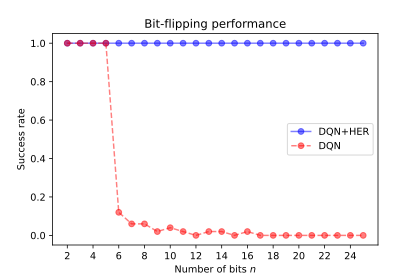

In [4]:
y = {'DQN': [], 'DQN_HER': []}
for n in bit_range:
    y['DQN'].append(max(avg_succ_rate['DQN'][n]['y']))
    y['DQN_HER'].append(max(avg_succ_rate['DQN_HER'][n]['y']))


plt.plot(bit_range,y['DQN_HER'], 'bo-', alpha=0.5, label = "DQN+HER")
plt.plot(bit_range,y['DQN'], 'ro--', alpha=0.5, label='DQN')

plt.legend()
plt.xticks(bit_range[::2])
plt.xlabel('Number of bits $n$')
plt.ylabel('Success rate')
plt.title('Bit-flipping performance')
plt.savefig('plot.png')
plt.show()